In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# storing the dataset path
clothing_fashion_mnist = tf.keras.datasets.fashion_mnist

# loading the dataset from tensorflow
(x_train, y_train),(x_test, y_test) = clothing_fashion_mnist.load_data()

# displaying the shapes of training and testing dataset
print('Shape of training cloth images: ',x_train.shape)

print('Shape of training label: ',y_train.shape)

print('Shape of test cloth images: ',x_test.shape)

print('Shape of test labels: ',y_test.shape)

Shape of training cloth images:  (60000, 28, 28)
Shape of training label:  (60000,)
Shape of test cloth images:  (10000, 28, 28)
Shape of test labels:  (10000,)


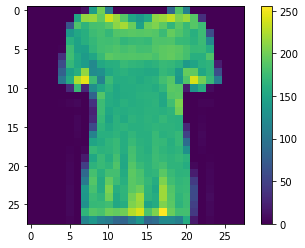

In [8]:
label_class_names = ['T-shirt/top', 'Trouser',
                     'Pullover', 'Dress', 'Coat',
                     'Sandal', 'Shirt', 'Sneaker',
                     'Bag', 'Ankle boot']
 
# display the first images
plt.imshow(x_train[10]) 
plt.colorbar()  # to display the colourbar
plt.show()

In [9]:
x_train = x_train / 255.0  # normalizing the training data
x_test = x_test / 255.0  # normalizing the testing data

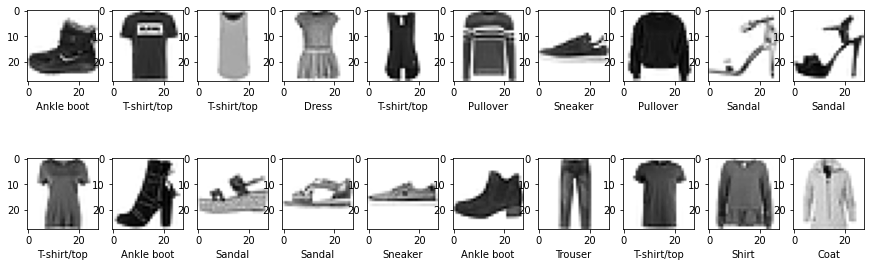

In [10]:
plt.figure(figsize=(15, 5))  # figure size
i = 0
while i < 20:
    plt.subplot(2, 10, i+1)
     
    # showing each image with colourmap as binary
    plt.imshow(x_train[i], cmap=plt.cm.binary)
     
    # giving class labels
    plt.xlabel(label_class_names[y_train[i]])
    i = i+1
     
plt.show()  # plotting the final output figure

In [22]:
# Building the model
cloth_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [23]:
cloth_model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [13]:
# Fitting the model to the training data
cloth_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 7ms/step - loss: 0.4957 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3744 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3374 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3143 - accuracy: 0.8834
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2957 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2817 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2686 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2608 - accuracy: 0.9024
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2477 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0

In [24]:
# calculating loss and accuracy score
test_loss, test_acc = cloth_model.evaluate(x_test,
                                           y_test,
                                           verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 2.4582 - accuracy: 0.1041 - 2s/epoch - 5ms/step

Test loss: 2.4581618309020996

Test accuracy: 0.10409999638795853


In [26]:
# using Softmax() function to convert
# linear output logits to probability
prediction_model = tf.keras.Sequential(
	[cloth_model, tf.keras.layers.Softmax()])

# feeding the testing data to the probability
# prediction model
prediction = prediction_model.predict(x_test)

# predicted class label
print('Predicted test label:', np.argmax(prediction[0]))

# predicted class label name
print(label_class_names[np.argmax(prediction[0])])

# actual class label
print('Actual test label:', y_test[0])

313/313 [==============================] - 1s 2ms/step
Predicted test label: 8
Bag
Actual test label: 9


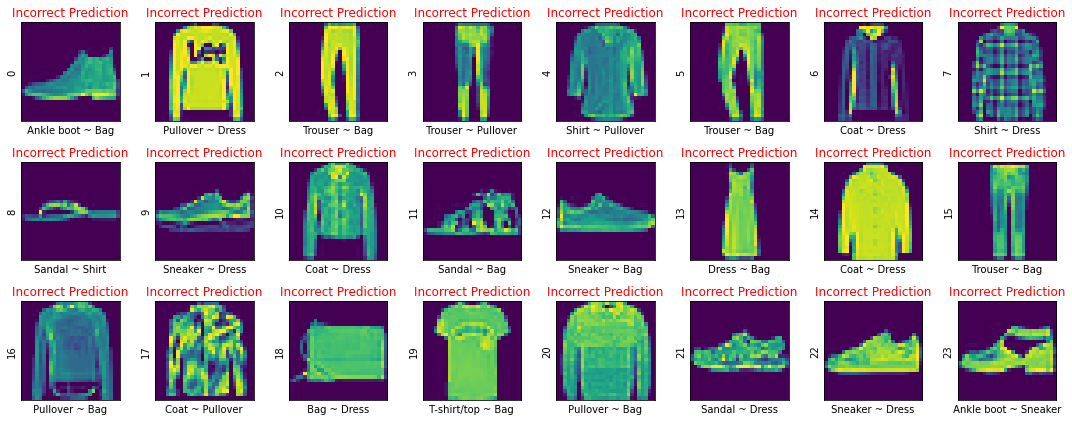

In [27]:
# assigning the figure size
plt.figure(figsize=(15, 6))
i = 0
 
# plotting total 24 images by iterating through it
while i < 24:
    image, actual_label = x_test[i], y_test[i]
    predicted_label = np.argmax(prediction[i])
    plt.subplot(3, 8, i+1)
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
     
    # display plot
    plt.imshow(image)
     
    # if else condition to distinguish right and
    # wrong
    if predicted_label == actual_label:
        color, label = ('green', 'Correct Prediction')
    else:
        color,label = ('red', 'Incorrect Prediction')
     
    # plotting labels and giving color to it
    # according to its correctness
    plt.title(label, color=color)
     
    # labelling the images in x-axis to see
    # the correct and incorrect results
    plt.xlabel(" {} ~ {} ".format(
        label_class_names[actual_label],
      label_class_names[predicted_label]))
     
    # labelling the images orderwise in y-axis
    plt.ylabel(i)
     
    # incrementing counter variable
    i += 1


In [30]:
cloth_model.save('C:/Users/rakes/sample_test.h5')

In [33]:
v=tf.keras.models.load_model('C:/Users/rakes/sample_test.h5')